In [ ]:
import numpy as np
import pandas as pd
# !pip install wordcloud
from wordcloud import WordCloud
# !pip install matplotlib
# !pip3 install matplotlib --upgrade
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPool1D
import tensorflow as tf

In [ ]:
df = pd.read_csv('tagged.csv')
df

,tag,Context,Response
0,Seek help.,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,Seek help.,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,Seek help.,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,Seek help.,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,Seek help.,I'm going through some things with my feelings...,I first want to let you know that you are not ...
...,...,...,...
277,Possible depression.,"I have no friends, no hobbies, and no interest...","Hello, and thank you for your question. It cer..."
278,Isolation Struggle,"I have a lot on my mind, but all I want to do ...",It has been said that depression is often the ...
279,Isolation Struggle,"I have a lot on my mind, but all I want to do ...",There are many possible issues to consider as ...
280,Isolation Struggle,"I have a lot on my mind, but all I want to do ...",There is a difference in someone agreeing to t...


In [ ]:
df.isna().sum()
df.dropna(axis=0, inplace=True)

In [ ]:
df.isna().sum()

tag         0
Context     0
Response    0
dtype: int64

In [ ]:
df.Response.nunique()

282

In [ ]:
# plt.figure(figsize=(15,25))
# df['Response'].value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df['numberwords'] = df.Context.apply(lambda x: len(x.split()))
df.head()

,tag,Context,Response,numberwords
0,Seek help.,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",60
1,Seek help.,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",60
2,Seek help.,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,60
3,Seek help.,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,60
4,Seek help.,I'm going through some things with my feelings...,I first want to let you know that you are not ...,60


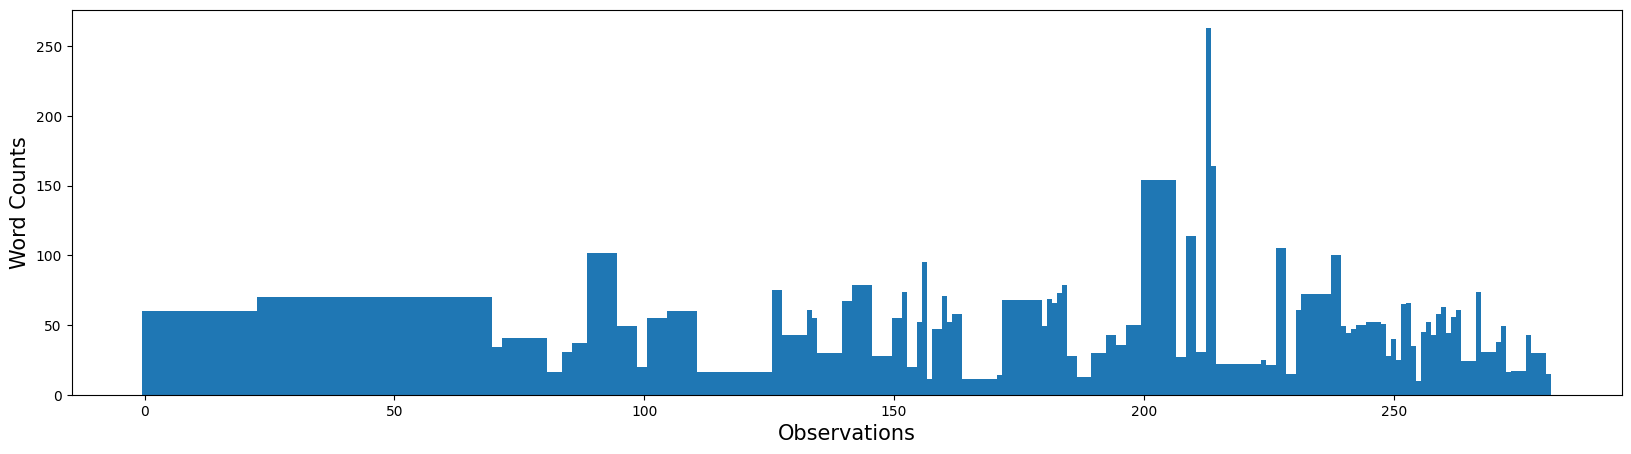

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(np.arange(len(df.numberwords)), df.numberwords.values, width=1)
plt.xlabel("Observations", fontsize=15)
plt.ylabel("Word Counts", fontsize=15);

In [ ]:
mc20w = Counter(" ".join(df["Context"]).split()).most_common(20)
mc20w

[('I', 1262),
 ('and', 573),
 ('to', 522),
 ('have', 430),
 ('my', 395),
 ('a', 378),
 ('of', 255),
 ('but', 172),
 ("I'm", 169),
 ('in', 149),
 ('for', 140),
 ('with', 137),
 ('the', 135),
 ('never', 133),
 ('feel', 131),
 ('Iâ€™m', 130),
 ('am', 129),
 ('been', 113),
 ('do', 110),
 ('me', 106)]

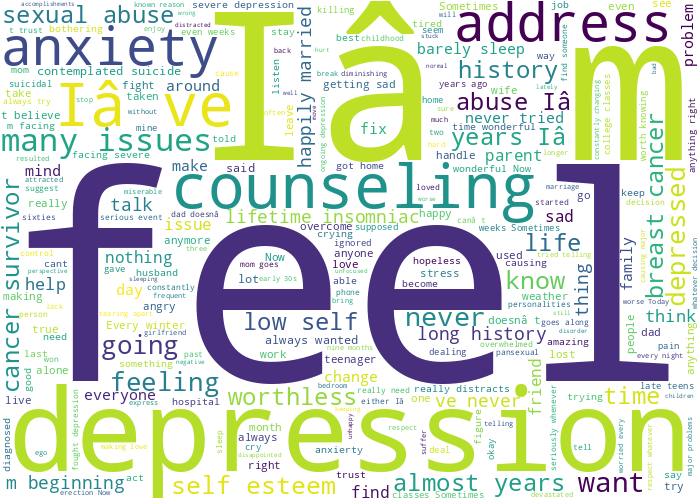

In [ ]:
# most used 250 words in data (word cloud)
long_string = ','.join(list(df['Context'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
df

,tag,Context,Response,numberwords
0,Seek help.,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",60
1,Seek help.,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",60
2,Seek help.,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,60
3,Seek help.,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,60
4,Seek help.,I'm going through some things with my feelings...,I first want to let you know that you are not ...,60
...,...,...,...,...
277,Possible depression.,"I have no friends, no hobbies, and no interest...","Hello, and thank you for your question. It cer...",43
278,Isolation Struggle,"I have a lot on my mind, but all I want to do ...",It has been said that depression is often the ...,30
279,Isolation Struggle,"I have a lot on my mind, but all I want to do ...",There are many possible issues to consider as ...,30
280,Isolation Struggle,"I have a lot on my mind, but all I want to do ...",There is a difference in someone agreeing to t...,30


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
punct_re=lambda x :" ".join(tokenizer.tokenize(x.lower()))
nltk.download('wordnet')
nltk.download('omw-1.4')


lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['Context'] = df['Context'].apply(lemmatize_text)
df['Context'] = df['Context'].apply(lambda x : " ".join(x))

df['Context'] = df['Context'].str.replace(r'\S*@\S*\s?', '', regex=True)
df['Context'] = df['Context'].str.replace(r'[^\w\s]', '', regex=True)
df['Context'] = df['Context'].str.replace(r'â€™', '', regex=True)
df['Context'] = df['Context'].str.replace(r'Â', '', regex=True)
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,tag,Context,Response,numberwords
0,Seek help.,Im going through some thing with my feeling an...,"If everyone thinks you're worthless, then mayb...",60
1,Seek help.,Im going through some thing with my feeling an...,"Hello, and thank you for your question and see...",60
2,Seek help.,Im going through some thing with my feeling an...,First thing I'd suggest is getting the sleep y...,60
3,Seek help.,Im going through some thing with my feeling an...,Therapy is essential for those that are feelin...,60
4,Seek help.,Im going through some thing with my feeling an...,I first want to let you know that you are not ...,60
...,...,...,...,...
277,Possible depression.,I have no friends no hobbies and no interest i...,"Hello, and thank you for your question. It cer...",43
278,Isolation Struggle,I have a lot on my mind but all I want to do i...,It has been said that depression is often the ...,30
279,Isolation Struggle,I have a lot on my mind but all I want to do i...,There are many possible issues to consider as ...,30
280,Isolation Struggle,I have a lot on my mind but all I want to do i...,There is a difference in someone agreeing to t...,30


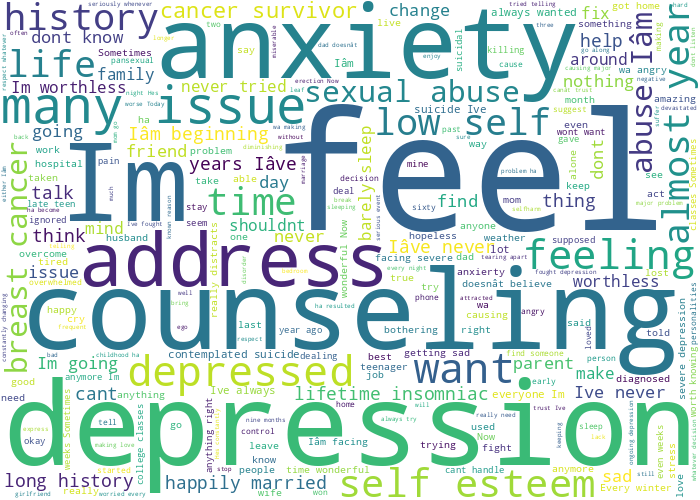

In [ ]:
# word cloud with most 250 words
long_string = ','.join(list(df['Context'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
dataDoc = df['Context'].values.tolist()
dataClass = df['tag'].values.tolist()

# Before digitizing the data using the Tfidf scoring method, we separate the data as training and testing.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=2) # min_df: It is used to ignore terms that rarely appear. Currently if a term occurs in less than 2 documents, it will be ignored.

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression # Imported to use logistic regression.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000)
lr_clf = lr.fit(x_train_tfidf, y_train)
pred_test_lr = lr_clf.predict(x_test_tfidf)


# The training score and test score are compared to see if our model has overfitted. If the values are close, there is no overfitting.
# Training score
pred_train_lr = lr_clf.predict(x_train_tfidf)
print('Logistic Regression Model training dataset accuracy: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test score
print('Logistic Regression Model test dataset accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))

Logistic Regression Model training dataset accuracy: 0.7773
Logistic Regression Model test dataset accuracy: 0.6901


In [ ]:
from sklearn.linear_model import SGDClassifier # Imported to use logistic regression with SGD
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42)
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train)
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf)
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf)

print('Logistic Regression with SGD Model training dataset accuracy: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))
print('Logistic Regression with SGD Model test dataset accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

Logistic Regression with SGD Model training dataset accuracy: 0.9953
Logistic Regression with SGD Model test dataset accuracy: 0.8592


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
import lightgbm as lgbm # Imported to use LightGBM
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=2, num_leaves=4, objective='multiclass')
# learning_rate=0.01> I reduced the number of learning steps to improve accuracy.
# I used min_data_in_leaf to reduce overfitting. Thus, by duplicating the minimum data to be found in each leaf, I prevented a leaf from becoming too specific.
# I used feature_fraction to reduce overfitting. Thus, the ratio of features to be randomly selected in each iteration was determined.

clf_LGBM.fit(x_train_tfidf, y_train)
pred_test_LGBM = clf_LGBM.predict(x_test_tfidf)
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf)

print('LightGBM Model training dataset accuracy: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))
print('LightGBM Model test dataset accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1104
[LightGBM] [Info] Number of data points in the train set: 211, number of used features: 171
[LightGBM] [Info] Start training from score -4.253246
[LightGBM] [Info] Start training from score -4.253246
[LightGBM] [Info] Start training from score -5.3

In [ ]:
from sklearn.svm import SVC # Imported to use SVC
clf_lin = SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # C is a parameter for SVC and a penalty for misclassifying data. As C falls, the classifier ignores misclassified data points.
clf_lin.fit(x_train_tfidf, y_train)
pred_test_svclin = clf_lin.predict(x_test_tfidf)
pred_train_svclin = clf_lin.predict(x_train_tfidf)

print('svclin Model training dataset accuracy: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))
print('svclin Model test dataset accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin Model training dataset accuracy: 0.8720
svclin Model test dataset accuracy: 0.7746


In [ ]:
from sklearn.svm import LinearSVC # It uses the Liblinear library instead of the libsvm library. It is more flexible.
lrsvc = LinearSVC(C=0.2, random_state=42) # C is a parameter for SVC and a penalty for misclassifying data. As C falls, the classifier ignores misclassified data points.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train)
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf)
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf)

print('lineer svc Model training dataset accuracy: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))
print('lineer svc Model test dataset accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))

lineer svc Model training dataset accuracy: 0.9905
lineer svc Model test dataset accuracy: 0.8592


In [ ]:
from keras.preprocessing.text import Tokenizer # In order for the machine to understand the text, a dictionary is created with a maximum of 10000 words used in the data set with Tokenizer.

tokenizer = Tokenizer(num_words=10000) # dictionary is created.
tokenizer.fit_on_texts(df.Context) # Texts are converted to tokens.

num_tokens = [len(tokens) for tokens in df['Context']]
num_tokens = np.array(num_tokens)

# max token sayısı
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

# Our neural network is asking us for inputs of equal size. In real life problems this is very difficult. That's why pad_sequences is used to make the data the same size.
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['Context']) # sentences are translated to the words in the dictionary.
Y = pd.get_dummies(df['tag']).values # We have made our output data understandable.
X_pad = pad_sequences(X, maxlen=max_tokens) # It is resized to the same size as pad_sequences. I also put the sentence size max_tokens which we calculated before as the length.

print(X_pad.shape, Y.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.25, random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(282, 577) (282, 54)
(211, 577) (211, 54)
(71, 577) (71, 54)


In [ ]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [ ]:
import keras # Keras is imported to use neural network.

model_ker = keras.Sequential() # A Sequential model is used to create a deep learning model with one input and one output layer.
model_ker.add(keras.layers.Embedding(10000, 100, input_length=max_tokens)) # converts text to vectors. Definition: Converts positive integer(s) to dense vectors of fixed size.
model_ker.add(keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model_ker.add(keras.layers.Dense(54, activation='softmax')) # # output layer. The SoftMAX activation function calculates relative probabilities. softmax is used because it is multi-class. It is used as activation for the last layer of the network because the result can be interpreted as a probability distribution. Softmax is used because the model is multi-class and has one correct answer.

model_ker.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy']) # categorical_crossentropy is used because it is a multi-class classification problem.

epochs = 50 # Specifies how many times the algorithm will run on the entire training dataset.
batch_size = 64 # batch is a number of cycles for iterating over one or more samples and making predictions. after each sample the predictions are compared with the expected outputs and an error is calculated. tries to improve the prediction according to the error.

callback = (keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, min_delta=0.001))# the model is run (observe the validation loss, if it does not improve at least 0.001 in 3 epochs(revolutions), stop the training.)

history = model_ker.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1 ,callbacks=[callback])
accr = model_ker.evaluate(x_test, y_test)

Epoch 1/50
3/3 [==============================] - 10s 2s/step - loss: 3.9811 - accuracy: 0.1376 - val_loss: 3.9669 - val_accuracy: 0.3182
Epoch 2/50
3/3 [==============================] - 7s 3s/step - loss: 3.9500 - accuracy: 0.3439 - val_loss: 3.9403 - val_accuracy: 0.3636
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 3.9128 - accuracy: 0.3545 - val_loss: 3.8972 - val_accuracy: 0.2727
Epoch 4/50
3/3 [==============================] - 5s 2s/step - loss: 3.8330 - accuracy: 0.2275 - val_loss: 3.7612 - val_accuracy: 0.1364
Epoch 5/50
3/3 [==============================] - 7s 2s/step - loss: 3.5695 - accuracy: 0.1746 - val_loss: 3.4626 - val_accuracy: 0.1364
Epoch 6/50
3/3 [==============================] - 5s 2s/step - loss: 3.3117 - accuracy: 0.1746 - val_loss: 3.4332 - val_accuracy: 0.1364
Epoch 7/50
3/3 [==============================] - 7s 3s/step - loss: 3.2150 - accuracy: 0.1746 - val_loss: 3.3830 - val_accuracy: 0.1364
Epoch 8/50
3/3 [========================

In [ ]:
#predict
pred_lstm = model_ker.predict(x_test,verbose=1,use_multiprocessing=True)
pred_lstm

3/3 [==============================] - 1s 139ms/step


array([[2.7997324e-02, 1.0596500e-03, 5.5601005e-04, ..., 3.6421006e-03,
        9.0504467e-04, 3.6756732e-04],
       [2.7997324e-02, 1.0596500e-03, 5.5601005e-04, ..., 3.6421006e-03,
        9.0504467e-04, 3.6756732e-04],
       [1.5982235e-03, 3.3606324e-04, 3.7127924e-05, ..., 5.7640666e-04,
        5.8036181e-05, 1.8569690e-05],
       ...,
       [1.5163621e-06, 2.9448775e-05, 6.1159444e-05, ..., 1.1840278e-03,
        1.9356567e-05, 6.1618175e-06],
       [8.6777654e-05, 7.4993695e-06, 4.2716756e-06, ..., 2.9611448e-04,
        5.7976122e-06, 1.8138543e-06],
       [3.0869989e-02, 1.7361840e-02, 1.6121238e-02, ..., 7.7169924e-03,
        2.2327745e-02, 1.5136102e-02]], dtype=float32)

In [ ]:
b = pred_lstm > 1.0e-1
pred_lstm_rounded = b.astype(int)
pred_lstm_rounded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print('LSTM Model test dataset accuracy: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_lstm_rounded)))

LSTM Model test dataset accuracy: 0.5915


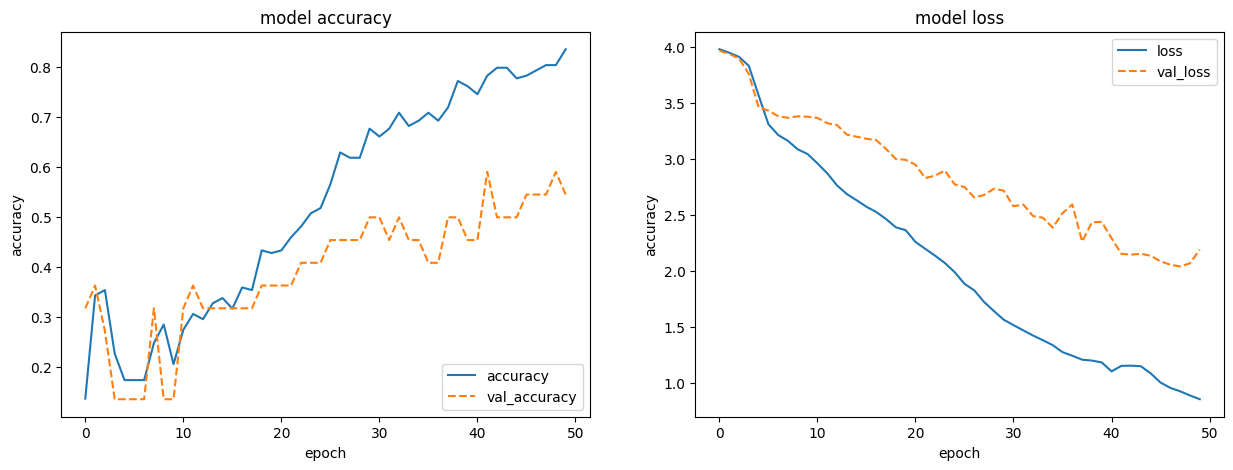

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'],'--')
axes[0].set_title('model accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['accuracy', 'val_accuracy'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'],"--")
axes[1].set_title('model loss')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['loss', 'val_loss'], loc='upper right');